In [1]:
import sys
%load_ext autoreload
%autoreload 2

sys.path.append("../libs/")
from data_prep import *



In [2]:
import pandas as pd

# Create a DataFrame with a categorical column
df = pd.DataFrame({'Category': ['A', 'B', 'A', 'C', 'B']})
print(type(df))
df.drop

# Use pd.get_dummies to one-hot encode the 'Category' column
df_encoded = pd.get_dummies(df, columns=['Category'])

print(df_encoded)


<class 'pandas.core.frame.DataFrame'>
   Category_A  Category_B  Category_C
0        True       False       False
1       False        True       False
2        True       False       False
3       False       False        True
4       False        True       False


In [3]:
########### Take care!!! RUN ONLY ONCE BECAUSE X gender= X gender-1 ALSO BECAUSE DROP FIRST ROW
import pandas as pd 


##Tests 
def test1(value):
    if value>=35:
        return 1
    else:
        return 0
def test2(value):
    if value <30 or value>60:
        return 1
    else:
        return 0

def tested(value):
    if value <=2 :
        return 1
    else:
        return 0
###

# Specify the file path
file_path = "../Datasets/defaults.xls"

# Read the Excel file into a DataFrame
df = pd.read_excel(file_path, index_col=0)
print(df.columns)
df=apply_function_to_column(df=df,column_name="X5",test_function=test1, new_name="Age_group") #VEZI SA FIE BALANCED
df=apply_function_to_column(df=df,column_name="X3",test_function=tested, new_name="Education_group") #VEZI SA FIE BALANCED


y = df["Y"].to_frame().copy()

num_features=["X1", "X5"] + [f"X{i}" for i in range (12,24,1)] +["Y"] #Y should not be dummied
cat_features=[col_name for col_name in df.columns if col_name not in num_features]


print(cat_features, num_features)
df["X2"]=df["X2"]-1

df = pd.get_dummies(df, columns = cat_features, drop_first= True)
print(df.columns)

print(df.head())

print(y.columns, y.head())
X = df.drop("Y", axis=1).copy()





print('aaaa',X.head())



X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.4, random_state=123)

X_val,X_test,y_val,y_test=train_test_split(X_test,y_test, test_size=0.5, random_state=123) ##this make 0.2 for both val and test

print(X_train.head())

## Save sensitive attributes

gender_train=X_train["X2_1"]
age_train=X_train["Age_group_1"]

gender_test=X_test["X2_1"]
age_test=X_test["Age_group_1"]

gender_val=X_val["X2_1"]
age_val=X_val["Age_group_1"]


education_train=X_train["X3_1"]
education_test=X_test["X3_1"]
education_val=X_val["X3_1"]








#Drop columns for without attribute and redundant ones

X_train_with_A=X_train.copy() #X with sensitive_attributes

print(X_train)


X_test_with_A=X_test.copy() #X with sensitive_attributes



X_val_with_A=X_val.copy() #X with sensitive_attributes


print(X_train.head())
print(X_train.shape,X_val.shape,X_test.shape, y_train.shape, y_val.shape)
print(X.columns)













Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'Y'],
      dtype='object')
['X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'Age_group', 'Education_group'] ['X1', 'X5', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'Y']
Index(['X1', 'X5', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y', 'X2_1', 'X3_1', 'X3_2', 'X3_3', 'X3_4',
       'X3_5', 'X3_6', 'X4_1', 'X4_2', 'X4_3', 'X6_-1', 'X6_0', 'X6_1', 'X6_2',
       'X6_3', 'X6_4', 'X6_5', 'X6_6', 'X6_7', 'X6_8', 'X7_-1', 'X7_0', 'X7_1',
       'X7_2', 'X7_3', 'X7_4', 'X7_5', 'X7_6', 'X7_7', 'X7_8', 'X8_-1', 'X8_0',
       'X8_1', 'X8_2', 'X8_3', 'X8_4', 'X8_5', 'X8_6', 'X8_7', 'X8_8', 'X9_-1',
       'X9_0', 'X9_1', 'X9_2', 'X9_3', 'X9_4', 'X9_5', 'X9_6', 'X9_7', 'X9_8',
       'X10_-1', 'X10_0', 'X10_2', 'X10_3', 'X10_4', '

In [4]:
store_data(dataset_name='Default_dataset',X_train_with_A=X_train_with_A, X_train_without_A = pd.DataFrame({'Category': ['A', 'B', 'A', 'C', 'B']}), X_val_with_A=X_val_with_A, 
            X_val_without_A =  pd.DataFrame({'Category': ['A', 'B', 'A', 'C', 'B']}), X_test_with_A = X_test_with_A, X_test_without_A=  pd.DataFrame({'Category': ['A', 'B', 'A', 'C', 'B']}), y_train =  y_train,
            y_val = y_val, y_test = y_test, age=[age_train, age_val, age_test], gender= [gender_train, gender_val, gender_test], education=[education_train, education_val, education_test])


Dataframes saved in their directory from 'Dataframes' directory.


# Brief analysis

Index(['X1', 'X5', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'X2_1', 'X3_1', 'X3_2', 'X3_3', 'X3_4',
       'X3_5', 'X3_6', 'X4_1', 'X4_2', 'X4_3', 'X6_-1', 'X6_0', 'X6_1', 'X6_2',
       'X6_3', 'X6_4', 'X6_5', 'X6_6', 'X6_7', 'X6_8', 'X7_-1', 'X7_0', 'X7_1',
       'X7_2', 'X7_3', 'X7_4', 'X7_5', 'X7_6', 'X7_7', 'X7_8', 'X8_-1', 'X8_0',
       'X8_1', 'X8_2', 'X8_3', 'X8_4', 'X8_5', 'X8_6', 'X8_7', 'X8_8', 'X9_-1',
       'X9_0', 'X9_1', 'X9_2', 'X9_3', 'X9_4', 'X9_5', 'X9_6', 'X9_7', 'X9_8',
       'X10_-1', 'X10_0', 'X10_2', 'X10_3', 'X10_4', 'X10_5', 'X10_6', 'X10_7',
       'X10_8', 'X11_-1', 'X11_0', 'X11_2', 'X11_3', 'X11_4', 'X11_5', 'X11_6',
       'X11_7', 'X11_8', 'Age_group_1', 'Education_group_1'],
      dtype='object')
Y    6636
dtype: int64
       Y
1      1
2      1
3      0
4      0
5      0
...   ..
29996  0
29997  0
29998  1
29999  1
30000  1

[30000 rows x 1 columns]


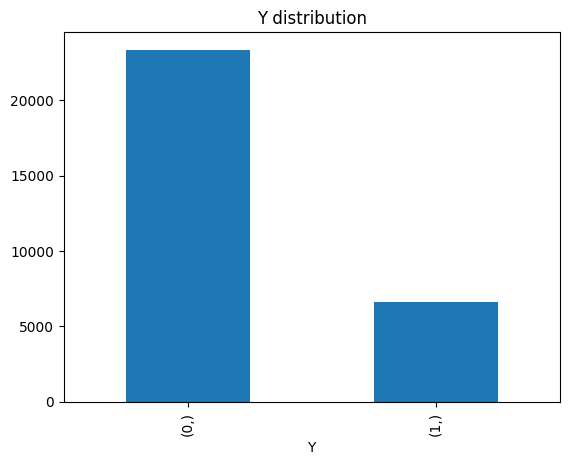

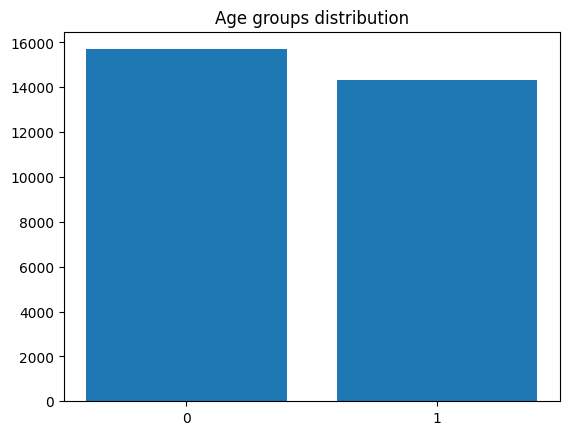

In [5]:
print(X.columns)
y.value_counts().plot.bar()
print(y.sum())
print(y)
plt.title("Y distribution")
plt.show()





# Create an array to represent the index (0 and 1)
index = np.array([0, 1])

# Create a list of the numbers
values = [X.shape[0]- X["Age_group_1"].sum(),X["Age_group_1"].sum()]

# Create the bar plot
plt.bar(index, values)

# Set the x-tick labels for the index
plt.xticks(index, ['0', '1'])

plt.title("Age groups distribution")
plt.show()


# Prediction

In [6]:
#########MODEL 


###Preprocessing part###

####SCALE
X_train_with_A, X_val_with_A, X_test_with_AA=scale_dataframes(
    [X_train_with_A, X_val_with_A, X_test_with_A])  ###scale all dfs ##Take care scale keeps 0,1 true


############# find best model

param_grid_rf = {
    'n_estimators': [10,50, 100],
    'max_depth': [5,10],
    'min_samples_leaf': [ 8,16]
}


#param_grid_svc = {
    #'C': [0.1, 1, 10],
    #'kernel': ['linear']
#}

param_grid_knn = {
    'n_neighbors': [3,5, 10, 20]
}


param_grid_lr = {
    'C': [ 0.001,0.01,0.1,1],
    'penalty': ['l2',
    ]
}




model_rf=RandomForestClassifier()

model_knn = KNeighborsClassifier()
model_lr = LogisticRegression(max_iter=500)  # The solver 'liblinear' is suitable for small datasets.



best_rf_A = find_best_model(model_rf, param_grid_rf, X_train_with_A, y_train.values.ravel(),  X_val_with_A, y_val.values.ravel())
best_knn_A = find_best_model(model_knn, param_grid_knn, X_train_with_A, y_train.values.ravel(), X_val_with_A, y_val.values.ravel() )
best_lr_A = find_best_model(model_lr, param_grid_lr, X_train_with_A, y_train.values.ravel(),  X_val_with_A, y_val.values.ravel())















Best Model Hyperparameters: {'n_estimators': 100, 'max_depth': 10, 'min_samples_leaf': 8}
Validation Accuracy: 0.8168333333333333
Best Model Hyperparameters: {'n_neighbors': 20}
Validation Accuracy: 0.8156666666666667
Best Model Hyperparameters: {'C': 0.1, 'penalty': 'l2'}
Validation Accuracy: 0.8211666666666667


# Save models for future use

In [7]:
import joblib
import os


dataset_name="Default_credit"
# Define the directory path for saving models
models_directory = os.path.join( '..', 'ML_models', dataset_name)  # '..' moves one directory up
# Create the 'models' directory if it doesn't exist

if not os.path.exists(models_directory):
    os.makedirs(models_directory)

# Save the best models to separate files
joblib.dump(best_rf_A, os.path.join(models_directory, 'best_random_forest_A_model.pkl'))
joblib.dump(best_knn_A, os.path.join(models_directory, 'best_knn_A_model.pkl'))
joblib.dump(best_lr_A, os.path.join(models_directory, 'best_logistic_regression_A_model.pkl'))

X_train_val_with_A, y_train_val = merge_two_sets(X_train_with_A, X_val_with_A, y_train, y_val)





best_rf_A.fit(X_train_val_with_A, y_train_val.ravel())
best_lr_A.fit(X_train_val_with_A, y_train_val.ravel())
best_knn_A.fit(X_train_val_with_A, y_train_val.ravel())

# Save the best models to separate files
joblib.dump(best_rf_A, os.path.join(models_directory, 'best_random_forest_big_A_model.pkl'))
joblib.dump(best_knn_A, os.path.join(models_directory, 'best_knn_big_A_model.pkl'))
joblib.dump(best_lr_A, os.path.join(models_directory, 'best_logistic_regression_big_A_model.pkl'))

print("Best models saved in the 'models' directory.")


Best models saved in the 'models' directory.
